# ETL Pipeline Preparation
Follow the instructions below to help you create theETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [34]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

from sqlalchemy import create_engine

from IPython.display import Markdown, display, HTML
def printmd(string):
    display(Markdown(string))

In [35]:
# load messages dataset
messages = pd.read_csv('messages.csv')
display(messages.head())
printmd('#### Shape of messages: ' + str(messages.shape)) 

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


#### Shape of messages: (26248, 4)

In [36]:
# load categories dataset
categories =pd.read_csv('categories.csv')
display(categories.head())
printmd('#### Shape of categories: ' + str(categories.shape))

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


#### Shape of categories: (26248, 2)

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [37]:
# merge datasets
df = messages.merge(categories, how='outer', on=['id'])
display(df.head())
printmd('#### Shape of df: ' + str(df.shape))

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


#### Shape of df: (26386, 5)

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [38]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(';', expand=True) # split column values

display(categories.head())
printmd('#### Shape of categories: ' + str(categories.shape))

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


#### Shape of categories: (26386, 36)

In [39]:
# select the first row of the categories dataframe
row = categories.loc[0, :]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.tolist() # get first row of categories as list
category_colnames = [col.split('-')[0] for col in category_colnames] #  remove number from each element of this list

printmd('#### These will be the column names of categories')
print(category_colnames)

#### These will be the column names of categories

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [40]:
# rename the columns of `categories`
categories.columns = category_colnames # set new colnames

display(categories.head())
printmd('#### Shape of categories: ' + str(categories.shape))

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


#### Shape of categories: (26386, 36)

### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [41]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] =  categories[column].apply(lambda x : x.split('-')[1])
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
    
    display(categories[column].value_counts())
    
display(categories.head())
printmd('#### Shape of categories: ' + str(categories.shape))

1    20042
0     6140
2      204
Name: related, dtype: int64

0    21873
1     4513
Name: request, dtype: int64

0    26265
1      121
Name: offer, dtype: int64

0    15432
1    10954
Name: aid_related, dtype: int64

0    24287
1     2099
Name: medical_help, dtype: int64

0    25067
1     1319
Name: medical_products, dtype: int64

0    25661
1      725
Name: search_and_rescue, dtype: int64

0    25915
1      471
Name: security, dtype: int64

0    25523
1      863
Name: military, dtype: int64

0    26386
Name: child_alone, dtype: int64

0    24702
1     1684
Name: water, dtype: int64

0    23430
1     2956
Name: food, dtype: int64

0    24044
1     2342
Name: shelter, dtype: int64

0    25976
1      410
Name: clothing, dtype: int64

0    25780
1      606
Name: money, dtype: int64

0    26085
1      301
Name: missing_people, dtype: int64

0    25506
1      880
Name: refugees, dtype: int64

0    25182
1     1204
Name: death, dtype: int64

0    22922
1     3464
Name: other_aid, dtype: int64

0    24677
1     1709
Name: infrastructure_related, dtype: int64

0    25174
1     1212
Name: transport, dtype: int64

0    25041
1     1345
Name: buildings, dtype: int64

0    25848
1      538
Name: electricity, dtype: int64

0    26227
1      159
Name: tools, dtype: int64

0    26103
1      283
Name: hospitals, dtype: int64

0    26266
1      120
Name: shops, dtype: int64

0    26077
1      309
Name: aid_centers, dtype: int64

0    25231
1     1155
Name: other_infrastructure, dtype: int64

0    19043
1     7343
Name: weather_related, dtype: int64

0    24209
1     2177
Name: floods, dtype: int64

0    23922
1     2464
Name: storm, dtype: int64

0    26104
1      282
Name: fire, dtype: int64

0    23925
1     2461
Name: earthquake, dtype: int64

0    25853
1      533
Name: cold, dtype: int64

0    25007
1     1379
Name: other_weather, dtype: int64

0    21273
1     5113
Name: direct_report, dtype: int64

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shape of categories: (26386, 36)

#### Result: 
- 'related' seems to be missclassified. There are class-0, class-1 and class-2. Hence, i.e. there is not a binary value distribution

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [42]:
# drop the original categories column from `df`
df = df.drop('categories', axis=1)

display(df.head())
printmd('#### Shape of df: ' + str(df.shape))

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


#### Shape of df: (26386, 4)

In [43]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)

display(df.head())
printmd('#### Shape of df: ' + str(df.shape))

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shape of df: (26386, 40)

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [44]:
# check number of duplicates
len(df)-len(df.drop_duplicates())

170

In [45]:
# drop duplicates
df = df.drop_duplicates()
printmd('#### Shape of df: ' + str(df.shape))

#### Shape of df: (26216, 40)

In [46]:
# check number of duplicates
len(df)-len(df.drop_duplicates())

0

### 7. Fix column 'related'
Drop rows, where column 'related' is classified with 2. As one can see those messages are messages which are, e.g.
- not translated
- without a meaning or not not understandable code like 
    - 'gjm.adgjmpgjm.adgjmgjmgjmgjmgjmgkmptwptwptwptwptwptwptwptwptwptwpwptwptwgjmgjmgjmad.ad.ad.ad.d.ad.d.da.d.ad.ad.ad'
    - Damocles!Hracles!Philockles!Hyphocles.!yayecles!zigzacles!domagecles!lucles!77h
    - 9GeQYeYGQEQtm
    - Aa.Bb.Cc.Dd.Ee.Ff.Gg.Hh.Ii.Jj.Kk.Ll.Mm.Nn.Oo.Pp.Qq.Rr.Ss.Tt.Uu.Vv.Ww.Xx.Yy.Zz.KERLANGE.

- incomplete (broken) messages like
    - NOTES: this message is not complete
    - The internet caf Net@le that's by the Dal road by the Maranata church ( incomplete )
    - It's Over in Gressier. The population in the area - Incomplete
    
As the amount of 188 messages with relates=2 is too low to justify a time consuming transformation process form them (like language translation from different langauages to English), these rows will be ignored   

In [47]:
# Idendify rows with related = 2
cat_missclassified = df[df['related'] == 2]

cat_missclassified = cat_missclassified.reset_index(drop=True)

# Check single messages
for index in range(len(cat_missclassified)):
    print(cat_missclassified.loc[index,'message'])
    print('')

Dans la zone de Saint Etienne la route de Jacmel est bloqu, il est trsdifficile de se rendre  Jacmel

. .. i with limited means. Certain patients come from the capital.

The internet caf Net@le that's by the Dal road by the Maranata church ( incomplete )

Bonsoir, on est a bon repos aprs la compagnie teleko sur la route a droite de l'impasse Roger colas aprs la 9e maison sur la main droite de la rue, on est environ 30 personnes sur un. ..

URGENT CRECHE ORPHANAGE KAY TOUT TIMOUN CROIX DES MISSIONS IMPASSE BALEV BUTTE BOYER MANQUE EAU ET NOURRITURE N ONT VU AUCUN SECOURS DEPUIS 8 JOURS HELP HELP

elle est vraiment malade et a besoin d'aide. utilisez mon numero de tlphone pour obtenir plus de renseignements. Nous attendons une reponse. Aucun numero fourni par contre.

no authority has passed by to see us. We don't have a place t sleep ( incomplete )

It's Over in Gressier. The population in the area - Incomplete

we sleep with the baby. Thanks in advance for the help you will bring us. (

In [48]:
# ignore rows with related = 2
df = df[df['related'] != 2]

display(df.head())
printmd('#### Shape of df: ' + str(df.shape))

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shape of df: (26028, 40)

### 8. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [49]:
# Save the clean dataset into an sqlite database
engine = create_engine('sqlite:///disaster.db')
df.to_sql('disaster', engine, index=False, if_exists='replace')

df_check = pd.read_sql("SELECT * FROM disaster", engine)
display(df_check.head())
printmd('#### Shape of df_check: ' + str(df_check.shape))

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shape of df_check: (26028, 40)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

### 9. DataFrame Understanding

#### Describtive Statistics

In [50]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,26028,NaN,NaN,NaN,15250.3,8841.43,2,7439.75,15756.5,22969.5,30265
message,26028,25990,#NAME?,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original,10038,9507,Nap fe ou konnen ke apati de jodi a sevis SMS ...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,26028,3,news,13036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
related,26028,NaN,NaN,NaN,0.764792,0.424137,0,1,1,1,1
request,26028,NaN,NaN,NaN,0.171892,0.377294,0,0,0,0,1
offer,26028,NaN,NaN,NaN,0.00453358,0.0671803,0,0,0,0,1
aid_related,26028,NaN,NaN,NaN,0.417243,0.493113,0,0,0,1,1
medical_help,26028,NaN,NaN,NaN,0.0800676,0.271403,0,0,0,0,1
medical_products,26028,NaN,NaN,NaN,0.0504457,0.218867,0,0,0,0,1


In [51]:
df.dtypes

id                         int64
message                   object
original                  object
genre                     object
related                    int64
request                    int64
offer                      int64
aid_related                int64
medical_help               int64
medical_products           int64
search_and_rescue          int64
security                   int64
military                   int64
child_alone                int64
water                      int64
food                       int64
shelter                    int64
clothing                   int64
money                      int64
missing_people             int64
refugees                   int64
death                      int64
other_aid                  int64
infrastructure_related     int64
transport                  int64
buildings                  int64
electricity                int64
tools                      int64
hospitals                  int64
shops                      int64
aid_center

#### DataFrame Overview

In [64]:
def get_dataframe_summary(df, cat_list, dummy_list):
    """ a reusable function for a dataframe summary in addition to the dataframe-describe() function
    
        INPUT: 
        ----------
        - df-  the DataFrame which should be described in an overview
        - cat_list - a list of all categorical input features
        - dummy_list - a list of all dummy input features 

        OUTPUT:
        ----------
        - print statements within the JUpyter notebook
        - output is auto generated
    """
    
    number_nan = df.isnull().sum()
    printmd('### DataFrame Overview')
    printmd('- Dataset with {} observations and {} columns'.format(df.shape[0], df.shape[1]))
    
    text_for_readme = '## DataFrame Overview\n'
    text_for_readme += 'Dataset with {} observations and {} columns\n\n'.format(df.shape[0], df.shape[1])
    
    print('___________________________________')
    printmd('- **Numerical** columns:')
    
    text_for_readme += '- **Numerical** columns:\n\n'
    text_for_readme += '\t| column_name | type | min | max | number NaN |\n\t| :-------------  | :-------------  | :-------------  | :-------------  | :-------------  |\n'
    row_num = []
    count_int = 0
    count_float = 0
    for col in df.columns.tolist():
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64') and col not in cat_list and col not in dummy_list:
            row_num.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            text_for_readme +=('\t| ' + str(col) + ' | ' + str(df[col].dtypes) + ' | ' + str(df[col].min()) + ' | ' + str(df[col].max()) + ' | '+ str(number_nan[col]) + ' | ' + '\n') 
            if df[col].dtypes == 'int64':
                count_int += 1
            if df[col].dtypes == 'float64':
                count_float += 1
    df_num = pd.DataFrame(row_num,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    text_for_readme +='\n\n'
    display(df_num)

    print('___________________________________')
    printmd('- **Categorical** columns:')
    
    text_for_readme += '- **Categorical** columns:\n\n'
    text_for_readme += '\t| column_name | type | min | max | number NaN |\n\t| :-------------  | :-------------  | :-------------  | :-------------  | :-------------  |\n'
    row_cat = []
    count_object = 0
    for col in df.columns.tolist():
        if df[col].dtypes == 'object' or col in cat_list:
            try:
                row_cat.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
                text_for_readme +=('\t| ' + str(col) + ' | ' + str(df[col].dtypes) + ' | ' + str(df[col].min()) + ' | ' + str(df[col].max()) + ' | '+ str(number_nan[col]) + ' | ' + '\n') 
            except:
                row_cat.append([col, df[col].dtypes, 'NaN', 'NaN', number_nan[col]])
                text_for_readme +=('\t| ' + str(col) + ' | ' + str(df[col].dtypes) + ' | '+ 'NaN' + ' | '+ 'NaN' + ' | '+ str(number_nan[col]) + ' | ' + '\n') 
            count_object += 1
    df_cat = pd.DataFrame(row_cat,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    text_for_readme +='\n\n'
    display(df_cat)

    print('___________________________________')
    printmd('- **Dummy** columns:')
    
    text_for_readme += '- **Dummy** columns:\n\n'
    text_for_readme += '\t| column_name | type | min | max | number NaN |\n\t| :-------------  | :-------------  | :-------------  | :-------------  | :-------------  |\n'
    row_dummy = []
    for col in dummy_list:
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64'):
            row_dummy.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            text_for_readme +=('\t| ' + str(col) + ' | ' + str(df[col].dtypes) + ' | ' + str(df[col].min()) + ' | ' + str(df[col].max()) + ' | '+ str(number_nan[col]) + ' | ' + '\n')
    df_dummy = pd.DataFrame(row_dummy,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    text_for_readme +='\n\n'
    display(df_dummy)
    
    print('___________________________________')
    printmd('- There are ***{} numerical*** ({}x int and {}x float) columns'.format(count_int + count_float, count_int, count_float))
    printmd('- There are ***{} categorical*** columns'.format(count_object))
    printmd('- There are ***{} dummy*** columns'.format(len(dummy_list)))
    
    print('___________________________________')
    printmd('- There are ***{} missing values*** in total in the dataset'.format(df.isnull().values.sum()))
    
    text_for_readme += '- There are ***{} numerical*** ({}x int and {}x float) columns\n'.format(count_int + count_float, count_int, count_float)
    text_for_readme += '- There are ***{} categorical*** columns\n'.format(count_object)
    text_for_readme += '- There are ***{} dummy*** columns\n'.format(len(dummy_list))
    text_for_readme += '- There are ***{} missing values*** in total in the dataset\n'.format(df.isnull().values.sum())
    
    with open('text_for_readme.txt', 'w') as f:
        f.write(text_for_readme)
        
get_dataframe_summary(df, cat_list=['id', 'message', 'original', 'genre'],dummy_list=['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report'])

### DataFrame Overview

- Dataset with 26028 observations and 40 columns

___________________________________


- **Numerical** columns:

,column_name,type,min,max,number NaN


___________________________________


- **Categorical** columns:

,column_name,type,min,max,number NaN
0,id,int64,2,30265,0
1,message,object,,| News Update | Serious loss of life expected ...,0
2,original,object,NaN,NaN,15990
3,genre,object,direct,social,0


___________________________________


- **Dummy** columns:

,column_name,type,min,max,number NaN
0,related,int64,0,1,0
1,request,int64,0,1,0
2,offer,int64,0,1,0
3,aid_related,int64,0,1,0
4,medical_help,int64,0,1,0
5,medical_products,int64,0,1,0
6,search_and_rescue,int64,0,1,0
7,security,int64,0,1,0
8,military,int64,0,1,0
9,child_alone,int64,0,0,0


___________________________________


- There are ***0 numerical*** (0x int and 0x float) columns

- There are ***4 categorical*** columns

- There are ***36 dummy*** columns

___________________________________


- There are ***15990 missing values*** in total in the dataset

#### How are the three different 'genre' types distributed?

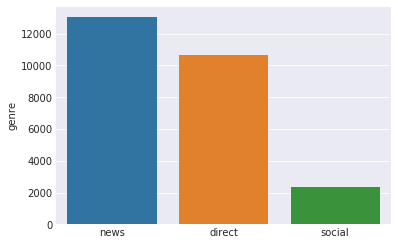

In [53]:
# Values counts for type of message
df['genre'].value_counts()
sns.barplot(x=df['genre'].value_counts().index, y=df['genre'].value_counts());

In [54]:
# number of NaN values in column genre
df['genre'].isna().sum()

0

#### Let's take a look a 100 randomly chosen messages

In [55]:
rand_set = np.random.randint(df.shape[0], size=(1, 100))
rand_set

array([[  503, 19345, 20679,  5401, 21033,  7610,  1157, 20240, 17077,
         5342, 13681, 16920, 14208, 14787,  8945, 21437, 19253, 22875,
        14413, 18696, 11755, 18040, 24456, 15417, 13079, 23754,  3929,
         4685, 16360,  4061, 18237, 20984,  9516, 17576, 23291, 12820,
        13561, 16144, 11554, 10832,  1786,   635, 17802, 15091, 10219,
         6450, 15578, 14059,  3556, 12187,  4006, 23626, 15328,  9826,
        23544, 21704, 19264, 21215, 12458, 23264, 20407,  7793, 15223,
        21730, 11860, 15721, 16152,  9003, 11827, 23109,   643, 16205,
        15846, 21525,  9921,  2774,  3748, 24982,  6775, 10785, 20479,
        17768,  8504,  5440,  1822, 17973,  9674,  1883,   267,  5326,
         6890, 23243, 13892,  9874,  1544, 17586, 16867, 18261, 17287,
        21869]])

In [56]:
# Check single messages
for index in rand_set[0]:
    try:
        print(df.loc[index,'message'])
        print('')
    except:
        pass

family. friends and all of those who knows me. . tell them that am alive thanks to god

In these neighbourhoods the ICRC has begun a winterization programme for 25,000 families, providing assistance to ensure basic shelter and heating.

Mostly young people, they spend their days collecting trash, spraying disinfectant, cooking food, distributing bottled water, handing out first aid supplies, and encouraging personal cleanliness.

In Maniche who is supporting victims? Help me find a group. 

As reported at the conference, UNDP has recently completed research, which quantifies the economic and social impact of water and energy tariff increases on the poor and of their limited access to these essential services in the Kyrgyz Republic and Tajikistan.

after each catastrophe which c' in this country all the world is master key are always with the current why the international assistances are never arrive at true the victims the state. 

to eat tomorrow we can't find anythinge we don't even 

#### Correlation plot of categorical columns

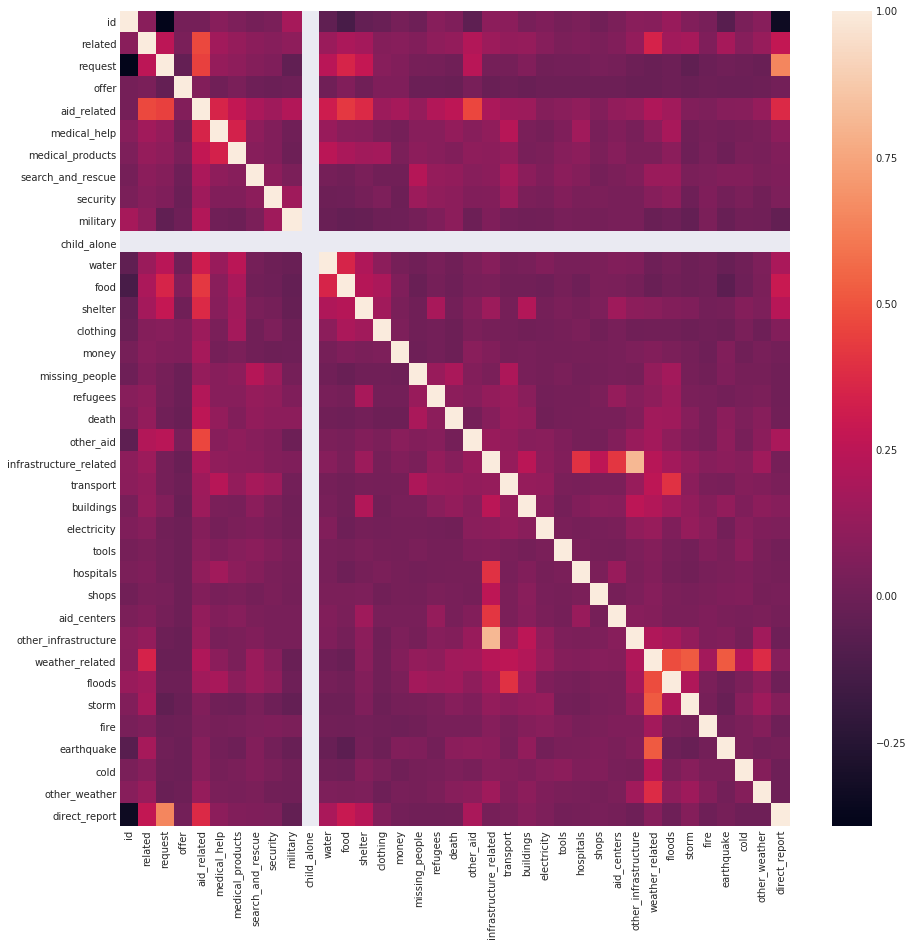

In [57]:
# Looking at correlations
plt.figure(figsize = (15,15)) #creating the 'canvas'
sns.heatmap(df.corr(), annot=False)

weather_related     0.206314
military            0.218461
refugees            0.220424
death               0.259136
medical_products    0.272396
water               0.309645
medical_help        0.348658
shelter             0.369172
direct_report       0.373165
food                0.420350
request             0.446743
other_aid           0.461664
related             0.469251
dtype: float64

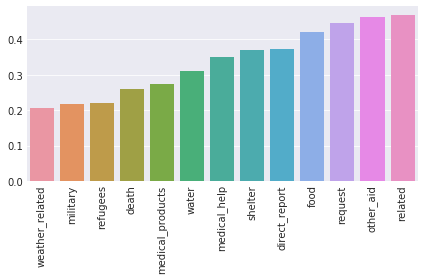

In [58]:
# Sort correaltion matrix
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack().sort_values()
corr_pop = corr_pairs['aid_related'].drop('aid_related', axis=0)

corr_pop = corr_pop[corr_pop > 0.2]
display(corr_pop)
sns.barplot(x=corr_pop.index, y=corr_pop);
plt.xticks(rotation=90)
plt.tight_layout()

In [59]:
df.columns.tolist()[4:]

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [60]:
message_length = df['message'].apply(lambda x: len(x))

In [61]:
message_length.sort_values()

12293        4
22863        6
22653        6
16657        6
21873        6
6839        17
12332       24
9845        27
2968        28
8762        29
8354        29
1481        29
1579        29
353         29
2538        29
3803        29
9149        30
2328        30
7688        30
6288        30
7343        30
8035        30
1451        30
5495        30
8468        30
12421       30
6344        30
487         30
12420       30
7552        30
         ...  
16201     2977
23209     2990
14842     3055
22949     3209
22759     3284
22158     3391
21665     3458
16258     3554
14839     3661
13774     3946
22366     3963
17404     4011
15947     4102
20809     4151
23044     4153
16962     4227
14812     4236
20902     4746
16028     4769
21221     5052
15233     5149
25095     5451
17455     5783
20790     6144
13967     6313
24972     6510
25266     6936
19525     6951
16151    10571
20985    10818
Name: message, Length: 26028, dtype: int64

In [62]:
df.loc[6839, 'message']

'paklascencion##s '

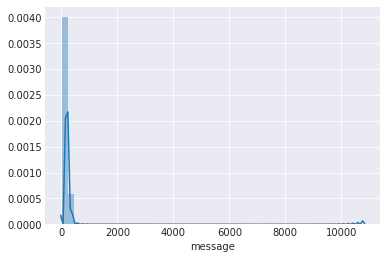

In [63]:
sns.distplot(message_length, kde=True)